This notebook explores an insurance dataset using both Apache Hive for analysing large-scale data and Python for further analysis and visualization like data cleaning, visualization and statistical insights. The combination provides efficient data handling and in-depth insights. This dataset includes personal and insurance-related attributes for individuals that are insured. The goal is to uncover patterns affecting insurance charges, particularly regarding smoking status, age, sex, and BMI.

# **Analysis of hive Query Results for Data Cleaning**


Below are the Hive queries used for data cleaning, followed by their output data and analysis.

### Create External Table
This query creates an external table named 'insurance' using the CSV file, skipping the header row

In [ ]:
-- Hive Query: Create external table
CREATE EXTERNAL TABLE IF NOT EXISTS insurance (
    age INT,
    sex STRING,
    bmi FLOAT,
    children INT,
    smoker STRING,
    region STRING,
    charges FLOAT
)
ROW FORMAT DELIMITED
FIELDS TERMINATED BY ','
STORED AS TEXTFILE
LOCATION '/user/pavethraavadiar/input/'
TBLPROPERTIES ("skip.header.line.count"="1");

O
Time taken: 1.234 seconds

The query below shows the number of records in the dataset.

In [ ]:
SELECT COUNT(*) FROM insurance;

In [ ]:
1338

### View head of the data (top 5 rows of the data)

In [ ]:
SELECT * FROM insurance LIMIT 5;

In [ ]:
19	female	27.9	0	yes	southwest	16884.924
18	male	33.77	1	no	southeast	1725.5522
28	male	33.0	3	no	southeast	4449.462
33	male	22.705	0	no	northwest	21984.47
32	male	28.88	0	no	northwest	3866.8552

The query above retrieves the first 5 rows of the insurance 'table' to inspect the loaded data. As per the observation above, charges column contains values more than 2 decimal places, like 21984.47061. In a real-world insurance dataset, financial values are typically rounded to two decimal places. This suggests that the dataset maybe synthetic or simulated for educational purposes, as also noted in the UCI Machine Learning Repository where it was sourced. While this does not impact analysis significantly, rounding may be considered for clearer presentation. For this assignment, the original values are retained to preserve dataset integrity.

### Check any missing values/NULLs in the entire table

In [ ]:
SELECT
  SUM(CASE WHEN age IS NULL THEN 1 ELSE 0 END) AS age_nulls,
  SUM(CASE WHEN sex IS NULL THEN 1 ELSE 0 END) AS sex_nulls,
  SUM(CASE WHEN bmi IS NULL THEN 1 ELSE 0 END) AS bmi_nulls,
  SUM(CASE WHEN children IS NULL THEN 1 ELSE 0 END) AS children_nulls,
  SUM(CASE WHEN smoker IS NULL THEN 1 ELSE 0 END) AS smoker_nulls,
  SUM(CASE WHEN region IS NULL THEN 1 ELSE 0 END) AS region_nulls,
  SUM(CASE WHEN charges IS NULL THEN 1 ELSE 0 END) AS charges_nulls
FROM insurance;

In [ ]:
0	0	0	0	0	0	0

I performed a null-check across all columns using Hive SQL. The query returned 0 for all columns which indicates that there are no missing values in the dataset. This confirms that the dataset is clean and complete with respect to null entries.

### Check for invalid ages

In [ ]:
SELECT *
FROM insurance
WHERE age < 0 OR age > 120;

In [ ]:
OK
Time taken: 1.184 seconds

The query returned no rows, it means there are no invalid ages. All ages are between 0 and 120 in my dataset.

### Check for invalid BMI

In [ ]:
SELECT *
FROM insurance
WHERE bmi <= 0 OR bmi > 60;

In [ ]:
OK
Time taken: 0.541 seconds

The query returned no rows, it means there are no invalid BMI like any values in negative. All BMI are between 0 and 60 in my dataset.

### Inspect children column

In [ ]:
SELECT children, COUNT(*)
FROM insurance
GROUP BY children
ORDER BY children;

In [ ]:
0	574
1	324
2	240
3	157
4	25
5	18

The majority of policyholders (574 out of 1338) do not have children, making up around 43% of my dataset. A significant number of people have 1 or 2 children, and very few individuals have 4 or more children and only 18 of the observations come from insured with 5 children.

### Analyse sex column

In [ ]:
SELECT sex, COUNT(*)
FROM insurance
GROUP BY sex;

In [ ]:
female	662
male	676

The above output shows that there is no invalid entry in sex column. This dataset is well balanced by gender, with 662 females and 676 males. This balance is good for building unbiased models since neither gender is overly represented. Having a failry equal gender distribution helps to ensure that any conclusion drawn on insurance charges, risk or behaviour are less likely to be skewed by gender imbalance. This means gender can be a useful categorical feature for analyzing differences in insurance costs or risk profiles.

### Analyse smoker status breakdown

In [ ]:
SELECT smoker, COUNT(*)
FROM insurance
GROUP BY smoker;

In [ ]:
no	1064
yes	274

From the above output, I can derive that majority of the individuals in the dataset are non-smokers, while smokers account for a smaller portion. This imbalance is typical in many populations where smokers are usually fewer than non-smokers. According to the World Health Organization (WHO) in 2023, 22.3% of the global population used tobacco, reflecting a minority of smokers within the population.(https://www.who.int/news-room/fact-sheets/detail/tobacco). Smoking status is a critical factor in insurance risk and charges since smokers generally face higher health risks and thus higher insurance costs. This will be confirmed in the next line of analysis. The clear categorical split between "yes" and "no" indicates that the data is clean with no missing smoker entries.

In [ ]:
SELECT smoker, AVG(charges) AS avg_charges
FROM insurance
GROUP BY smoker;

In [ ]:
no	8434.268304122123
yes	32050.23178033759

The above output shows the average insurance charges for smokers and non-smokers. This clearly shows that smoking status is critcal factor influencing insurance charges. This significantly higher insurance charges observed for smokers in reflects well-established medical evidence linking tobacco use to increased health risks. As per the Smoking and Tobacco Use analysis done in 2024 (https://www.cdc.gov/tobacco/about/?CDC_AAref_Val=https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/effects_cig_smoking/index.htm), cigarette smoking is a major public health concern with over 16 million Americals living with diseases. These increased health risks translate to higher medical costs over a smoker's lifetime. Insurance companies use actuarial data that show smokers have greater likelihood of filing costly claims. To compensate for this increased risk and potential financial burden, insurers charge smokers higher premium. Increased morbidity and mortality from tobacco use, leads to higher premium charges.

### Analyse region frequency

In [ ]:
SELECT region, COUNT(*)
FROM insurance
GROUP BY region;

In [ ]:
northeast	324
northwest	325
southeast	364
southwest	325

The distribution of policyholders across regions is relatively balanced, with each region contributing to a similar number of entries. Southeast region has slightly higher number of policyholders while Northeast has the lowest number of policyholders, but differences are not substantial. This even distribution suggests that the dataset was likely sampled in a way that represents various geographic populations fairly equally. This is critical to ensure that any regional analysis of health insurance cost os risk factors like smoking or BMI is not biased due to over or under representation of a particular area.

### Insurance Charges Range Distribution

In [ ]:
SELECT
  CASE
    WHEN charges < 5000 THEN '< 5K'
    WHEN charges BETWEEN 5000 AND 10000 THEN '5K - 10K'
    WHEN charges BETWEEN 10001 AND 20000 THEN '10K - 20K'
    WHEN charges BETWEEN 20001 AND 30000 THEN '20K - 30K'
    WHEN charges > 30000 THEN '> 30K'
  END AS charge_range,
  COUNT(*)
FROM insurance
GROUP BY
  CASE
    WHEN charges < 5000 THEN '< 5K'
    WHEN charges BETWEEN 5000 AND 10000 THEN '5K - 10K'
    WHEN charges BETWEEN 10001 AND 20000 THEN '10K - 20K'
    WHEN charges BETWEEN 20001 AND 30000 THEN '20K - 30K'
    WHEN charges > 30000 THEN '> 30K'
  END
ORDER BY charge_range;

In [ ]:
10K - 20K	353
20K - 30K	111
5K - 10K	353
< 5K	359
> 30K	162

The above output shows that most insurance policyholders in the dataset fall within low to mid-range charges. Around 73% of individuals (359+353+353) pay less than USD 20,000 premium for their insurance coverage. This indicates most individuals have relatively lower insurance costs, possibly due to lower risk factors like non-smoking status, normal BMI and younger age. The smaller segment of people with high charges may be associated with high risk categories which usually results in higher medical expenses and therefore higher insurance charges. This breakdown helps us to visualize the cost burden among different demographics and will be critical when analyzing what factors contribute to higher charges.

### check for duplicates

In [ ]:
SELECT age, sex, bmi, children, smoker, region, charges, COUNT(*) AS cnt
FROM insurance
GROUP BY age, sex, bmi, children, smoker, region, charges
HAVING COUNT(*) > 1;

In [ ]:
19	male	30.59	0	no	northwest	1639.5631	2

There is one duplicate entry identified in the datasett for a non-smokiong male aged 19, with BMI 30.59 and no children from the Northwest region that's being charged USD 1639.56. This entry appeared twice and does not seem like a true error. This is possible in a real-world insurance dataset, as pricing models are standardized for profiles. Removing this duplicate could reduce the representativeness of this profile group and bias my insights. Therefore, I retained the duplicate entry. This shows that insurance charges are consistent across individuals with similar risk profiles.

### check for distinct values in categorical columns

In [ ]:
SELECT DISTINCT sex FROM insurance;
SELECT DISTINCT smoker FROM insurance;
SELECT DISTINCT region FROM insurance;

In [ ]:
female
male

In [ ]:
no
yes

In [ ]:
northeast
northwest
southeast
southwest

The above output confirms that values in the 3 columns are consistent, lowercased and no typos or extra whitespace. Therefore, no further cleaning is required.

### Average BMI by region

In [ ]:
SELECT region, AVG(bmi) AS avg_bmi FROM insurance GROUP BY region;

In [ ]:
northeast	29.173503078060385
northwest	29.19978463979868
southeast	33.355989031739284
southwest	30.59661532475398

To understand health risks at the regional level, i calculated average BMI for each region. Southeast region has the highest average BMI, indicating greater risk of obesity-related conditions. Northeast and Northwest show almost similar and lower average BMIs.

### Maximum, Minimum and Average charges by region:

In [ ]:
SELECT region,
       MAX(charges) AS max_charge,
       MIN(charges) AS min_charge,
       AVG(charges) AS avg_charge
FROM insurance
GROUP BY region;

In [ ]:
northeast	58571.074	1694.7964	13406.38453128014
northwest	60021.4	    1621.3402	12417.575369591346
southeast	63770.43	1121.8739	14735.411452073316
southwest	52590.83	1241.565	12346.93732797476

This query gives descriptive statistics of charges by region. Based on this, we can see that the average charges is highest for the Southeast region. However, further exploration of the data is done in the next section of the analysis.

In [ ]:
CREATE VIEW insurance_summary AS
SELECT sex, smoker, region, AVG(charges) AS avg_charges, COUNT(*) AS count_records
FROM insurance
GROUP BY sex, smoker, region;

In [ ]:
SELECT * FROM insurance_summary WHERE region = 'southeast' ORDER BY avg_charges DESC;

In [ ]:
male	yes	southeast	36029.839417613635	55
female	yes	southeast	33034.82074652778	36
female	no	southeast	8440.205582213915	139
male	no	southeast	7609.003565546292	134

### Top 5 highest charges of premium:

In [ ]:
SELECT * FROM insurance ORDER BY charges DESC LIMIT 5;

In [ ]:
54	female	47.41	0	yes	southeast	63770.43
45	male	30.36	0	yes	southeast	62592.875
52	male	34.485	3	yes	northwest	60021.4
31	female	38.095	1	yes	northeast	58571.074
33	female	35.53	0	yes	northwest	55135.402

The above output shows the top 5 highest charged individuals all of whom are smokers with high BMI.

### Average charges by sex and smoker (combined grouping):

In [ ]:
SELECT sex, smoker, AVG(charges) AS avg_charges FROM insurance GROUP BY sex, smoker;

In [ ]:
female	no	8762.297322665534
female	yes	30678.99621263587
male	no	8087.204719705785
male	yes	33042.00593307783

The output above clearly shows that smokers, regardless of gender, have much higher average charges. This also suggests that male smokers are charged slightly higher than female smokers.

To begin my analysis, I performed initial data exploration and cleaning in Hive using the dataset. I've checked for missing values, whitespaces and inconsistent categorical values. I've also explored the distributions of categorical columns and numeric columns using 'GROUP BY' queries. Preliminary exploration in Hive revealed that smoking status and BMI are key drivers of high insurance charges, with the top 5 charges belonging to smokers. The average charges grouped by sex and smoker status highlight how smoking inflates costs significantly across both genders. Southeast region shows highest average BMI and charges.

Since the data is cleaned and key summaries have been identified, I'll load the Hive-cleaned dataset into Python and visualize the trends using 'matplotlib' and 'seaborn'. I'll then derive insights using visualization. Finally, I'll provide recommendations and conclusions based on my findings.

# **Data Visualization using Python**

Data Visualization, Insights and Explanation is done in the next section of the analysis.

In [ ]:
import pandas as pd
url="https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df=pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Based on the descriptive statistics summary of the dataset, we can derive meaningful insights.

Age is within the range of 18 to 64 years old and the mean of age is 39.2 years. This dataset mostly includes adults in early to late working age and the distribution appears relatively even as the median, 39 is close to the mean, 39.2.

BMI is within the range of 15.96 to 53.13 and the mean is 30.66. The average BMI is just above the obesity threshold. As per the https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html , published in 2024, an individual is obese when the BMI range is 30 or greater. This suggests that a significant portion of individuals are overweight or obese. The 75th percentile is at 34.69, indicating 25% of the population has a BMI well into the obesity range.

The number of children each insured has is within the range of 0 to 5 and the mean is at 1.09. This means most insured individuals have 1 or no children which can be confirmed by 25th and 50th percentiles at 0 and 1. Large families with 4 to 5 children are relatively rare in this dataset.

Insurance Premium charges range from USD 1,121.87 to USD 63,770.43. The average insurance cost is around USD 13,270. However, the standard deviation is quite high at USD 12,110, and the maximum charge is nearly USD 64,000, which indicates a highly skewed distribution. The median is only USD 9,382, which is much lower than the mean and this confirms positive skewness whereby a small number of individuals pay very high premiums, likely smokers or high risk individuals.

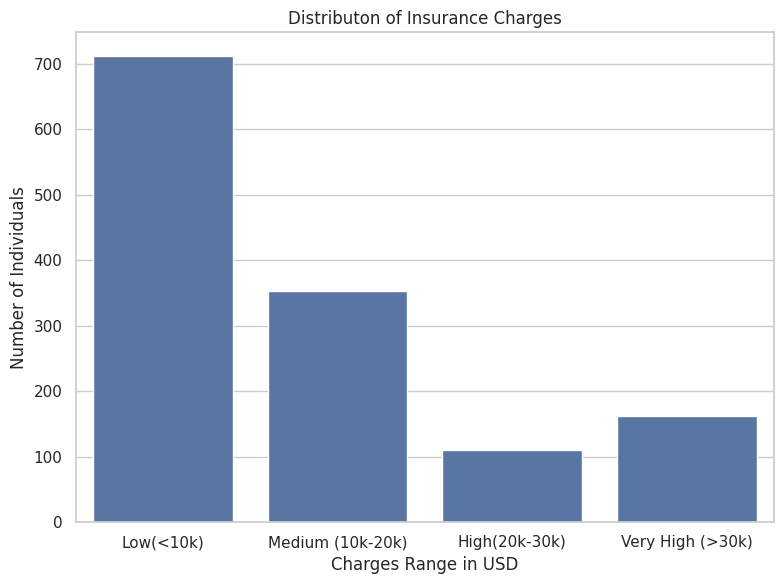

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn style
sns.set(style="whitegrid")

#define bins and labels
bins=[0,10000,20000,30000, df['charges'].max()]
labels=['Low(<10k)', 'Medium (10k-20k)', 'High(20k-30k)', 'Very High (>30k)']

#create new column
df['charge_range']=pd.cut(df['charges'], bins=bins, labels=labels, include_lowest=True)

#count plot for charge ranges
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='charge_range',order=labels)

plt.title("Distributon of Insurance Charges")
plt.xlabel("Charges Range in USD")
plt.ylabel("Number of Individuals")
plt.tight_layout()
plt.show()

Based on the above graph, we can derive that most of the individuals are charged less than USD 10,000 and least of the individuals were charged at the range of USD 20,000 to USD 30,000. This indicates that high insurance charges are relatively rare in this dataset.

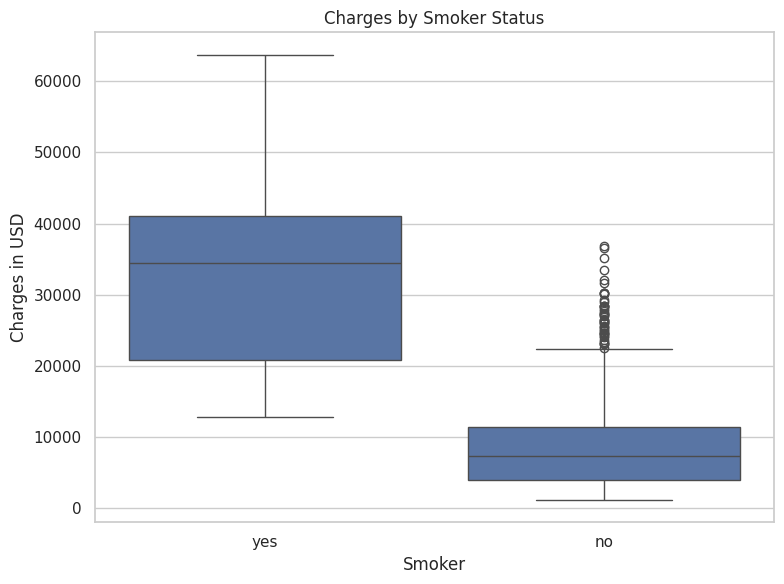

In [ ]:
plt.figure(figsize=(8,6))

# Charges distribution by smoker
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges in USD')
plt.tight_layout()
plt.show()

Based on the above boxplot, we can see that the median insurance charges are significantly higher for the smoking individuals compared to the non-smokers. For smokers, median line appears slightly above the centre of the box, but the longer upper whisker indicates right skewed distribution. This suggests that while most smokers are paying high insurance charges, some pay extremely high amounts, increasing overall variability. On the other hand, non-smokers have lower and more consistent charges. Narrower interquartile range (IQR) and shorter whiskers indicate less variability. However, several outliers suggest some non-smokers still have high cost maybe due to other health factors like age or BMI.

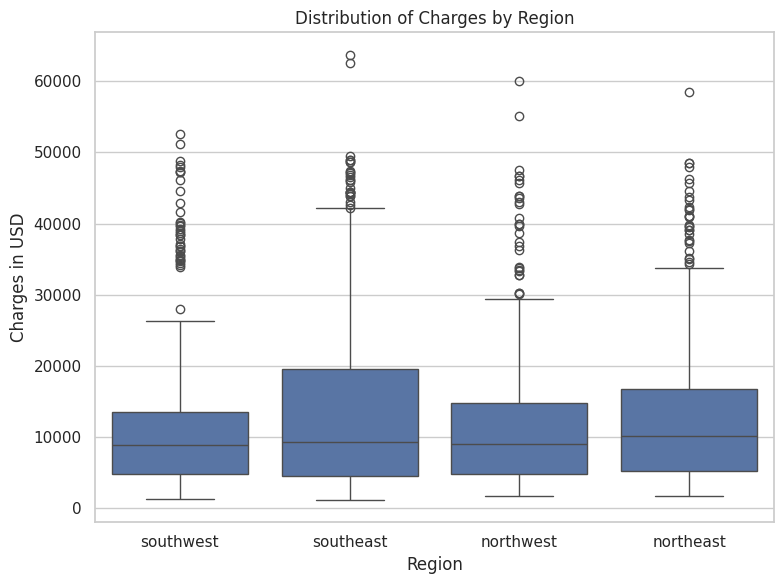

In [ ]:
plt.figure(figsize=(8,6))

# Charges distribution by region
sns.boxplot(x='region',y='charges',data=df)
plt.title('Distribution of Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges in USD')
plt.tight_layout()
plt.show()

The above boxplot shows that Southeast region incurs the highest insurance charges compared to other regions. This is evident from both the median line in the plot and the wider spread of charges. Moreover, all regions display outliers, suggesting some individuals incur significantly higher insurance cost than the average. Notably, Southeast, Northwest and Northeast regions exhibit more extreme outliers, which may point to individuals with specific risk factors like smoking, high BMI or advanced age which drives up the insurance charges. In overall, these patterns highlight that regional and demographic factors may influence insurance charges

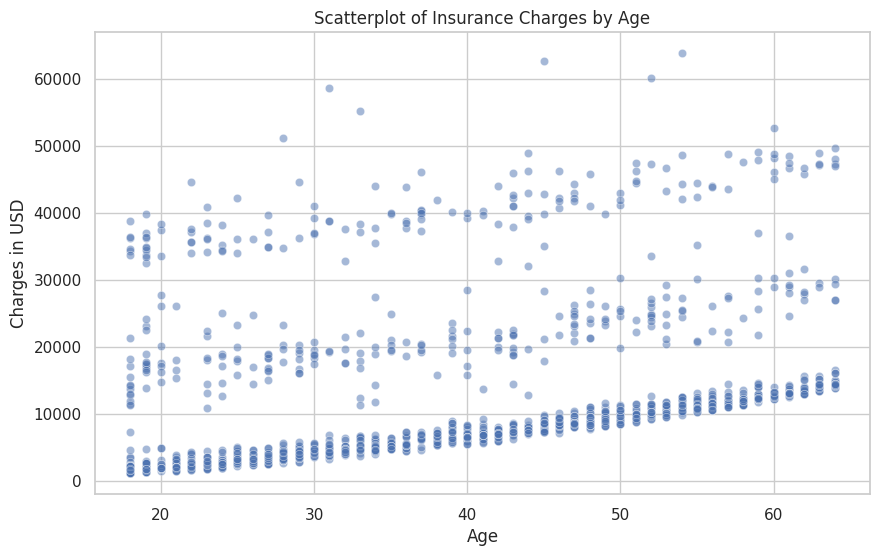

In [ ]:
plt.figure(figsize=(10,6))

# Charges distribution by age
sns.scatterplot(x='age',y='charges',data=df,alpha=0.5)
plt.title('Scatterplot of Insurance Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges in USD')
plt.show()

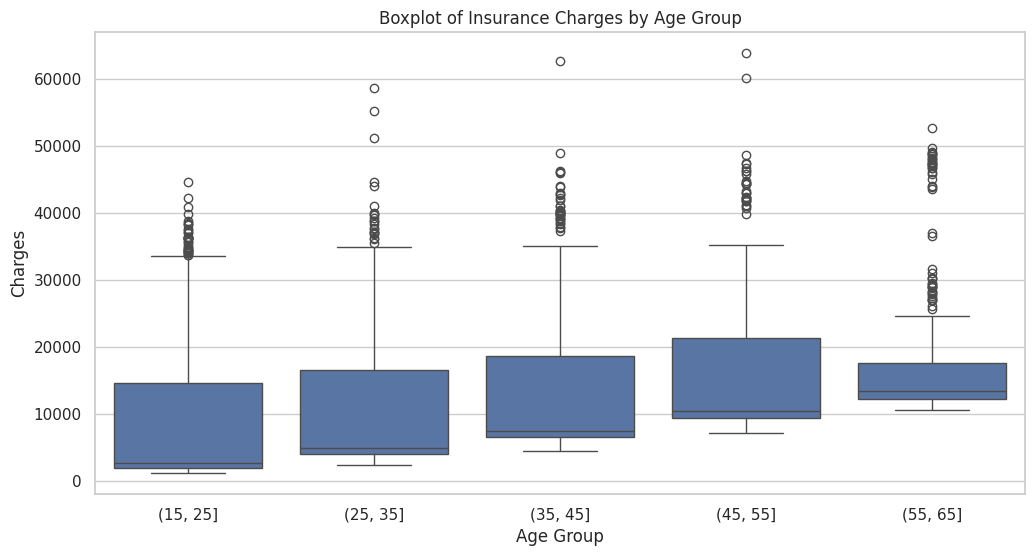

In [ ]:
#create new column
df['age_group']=pd.cut(df['age'], bins=range(15,70,10))

plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='age_group',y='charges')

plt.title("Boxplot of Insurance Charges by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Charges")
plt.show()

From the above scatterplot, it's evident that the insurance charges increase by age. There is a positive correlation between age and insurance charges. This indicates that the age is a significant factor in determining insurance charges. On the other hand, from the boxplot above, the presence of outliers for each age shows that age is not the only factor that determine the insurance charges, it could possibly higher due to smoking status, BMI, or even sex.

<Figure size 1200x600 with 0 Axes>

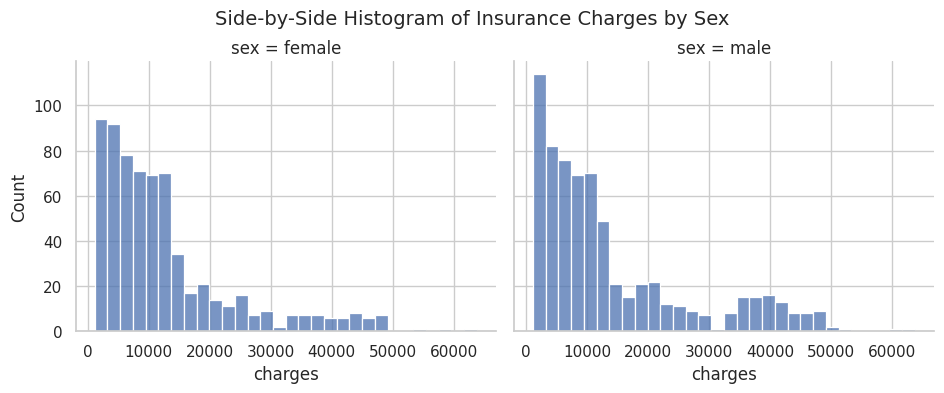

In [ ]:
plt.figure(figsize=(12,6))
sns.displot(data=df,x='charges',col='sex',bins=30,kde=False,height=4,aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Side-by-Side Histogram of Insurance Charges by Sex', fontsize=14)
plt.show()

sex
male      676
female    662
Name: count, dtype: int64


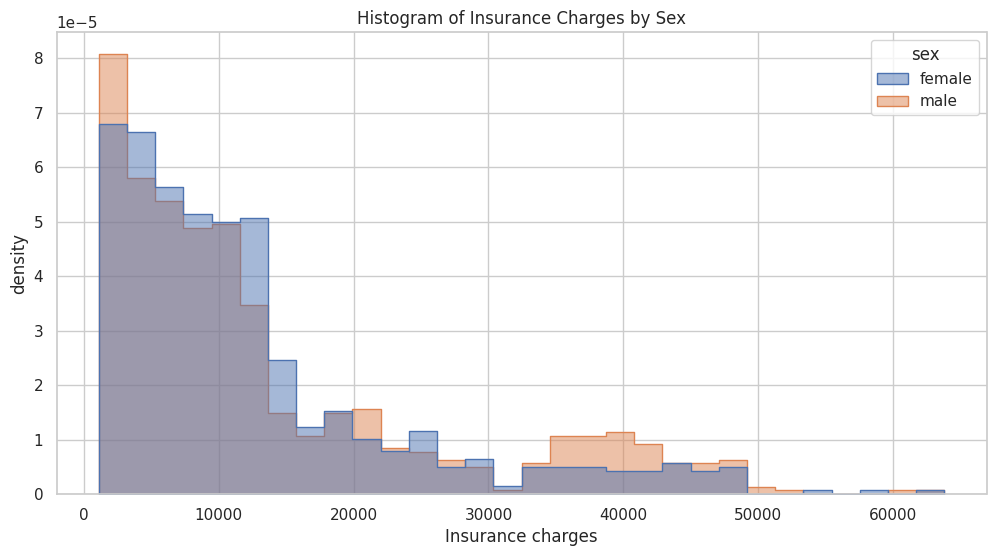

In [ ]:
print(df['sex'].value_counts())

plt.figure(figsize=(12,6))
sns.histplot(data=df,x='charges',hue='sex',element='step',stat='density',common_norm=False,bins=30,alpha=0.5)

plt.title("Histogram of Insurance Charges by Sex")
plt.xlabel("Insurance charges")
plt.ylabel("density")
plt.show()

Based on the histogram above,the distribution of charges is positively skewed for both males and females. This means most individuals pay lower charges, while a few pay very high amounts. Both males and females have high concentration of insurance charges in the range of USD0 to USD 15,000. This suggests that the majority of policyholders, regardless of sex, fall into a lower charge bracket. Males show slightly wider spread in higher charge ranges (USD 30,000 - USD 50,000), which may indicate that more males incur higher insurance charges due to factors like higher BMI, smoking rates or age. The general shape and trend of the histogram seems similar between both the genders which suggests that sex may not be a strong independent factor, or its influence may interact with other variables like smoking or age.

<ipython-input-12-232c13439c75>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df,x='children',y='charges',ci=None)


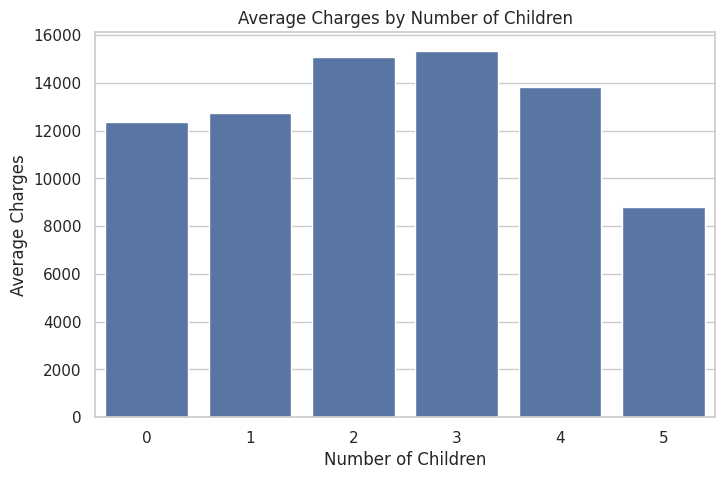

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='children',y='charges',ci=None)
plt.title("Average Charges by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Average Charges")
plt.show()

The barplot above shows the average insurance charges grouped by number of children. We observe that individuals with 2 or 3 children tend to have the highest average charges, around USD 15,000. Those with 0 or 1 child have slightly lower average charges. Interestingly, individuals with 4 children also show relatively high average charges around USD 13,900. However, the average charges drop for those with 5 children to about USD 8,500, which might be influenced by the smaller sample size.

This suggests that while having more children correlates with slightly higher insurance charges, the relationship is not strictly linear. Other factors like age, smoking status, or BMI may also influence this pattern.

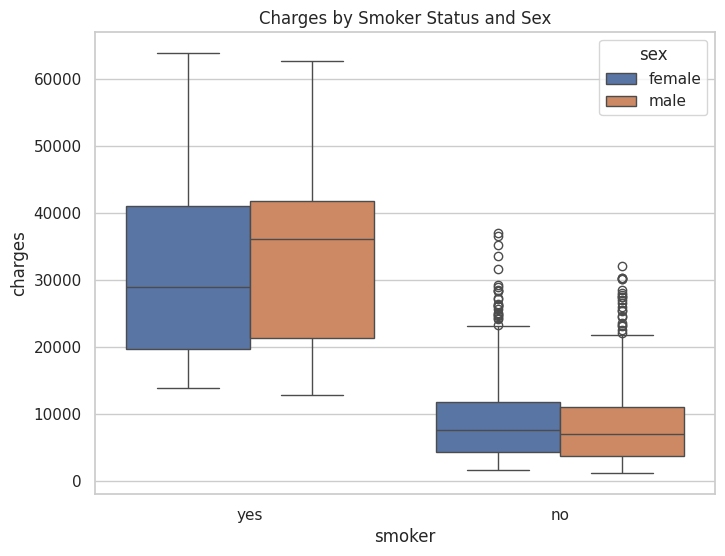

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x='smoker',y='charges',hue='sex')
plt.title("Charges by Smoker Status and Sex")
plt.show()

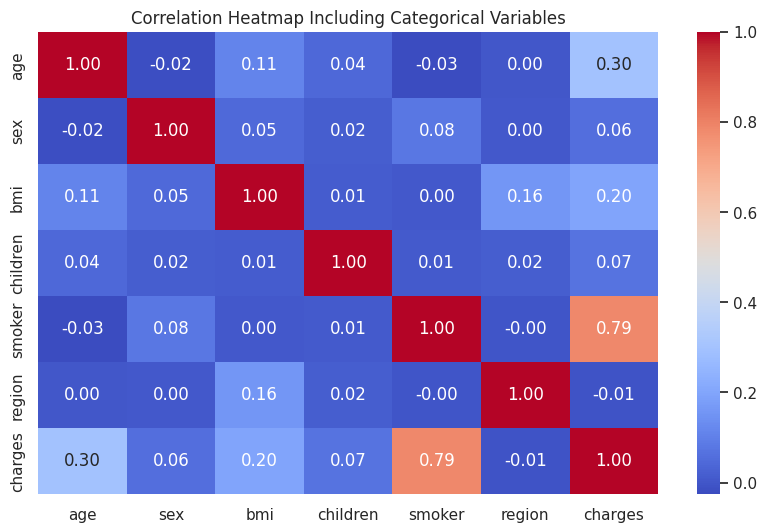

In [ ]:
#make a copy of dataframe
df_encoded=df.copy()

#encode categorical variables
df_encoded['sex']=df_encoded['sex'].map({'male':1,'female':0})
df_encoded['smoker']=df_encoded['smoker'].map({'yes':1,'no':0})
df_encoded['region']=df_encoded['region'].astype('category').cat.codes

#drop 'charge_range' and 'age_group' if they exist(non numeric)
df_encoded=df_encoded.drop(columns=['charge_range','age_group'],errors='ignore')

#plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correlation Heatmap Including Categorical Variables")
plt.show()

From the above correlation heatmap, the strength and direction of the linear relationships between numerical and encoded categorical variables can be identified. It is evident that smoking status (smoker) has the strongest positive correlation with insurance charges at 0.79, indicating that being a smoker significantly increases the premium cost. Age shows a moderate positive correlation with charges at 0.3, suggesting older individuals tend to pay higher insurance charges. BMI has a weak-to-moderate correlation with Insurance charges at 0.2 indicating some influence due to its connection with health risks. Region shows a negative correlation of -0.01, implying almost no linear relationship with insurance charges. Number of Children has a very weak positive correlation at 0.07 indicating minimal impact. Sex also shows a very weak correlation at 0.06, suggesting gender is not a significant standalone factor in determining insurance cost.

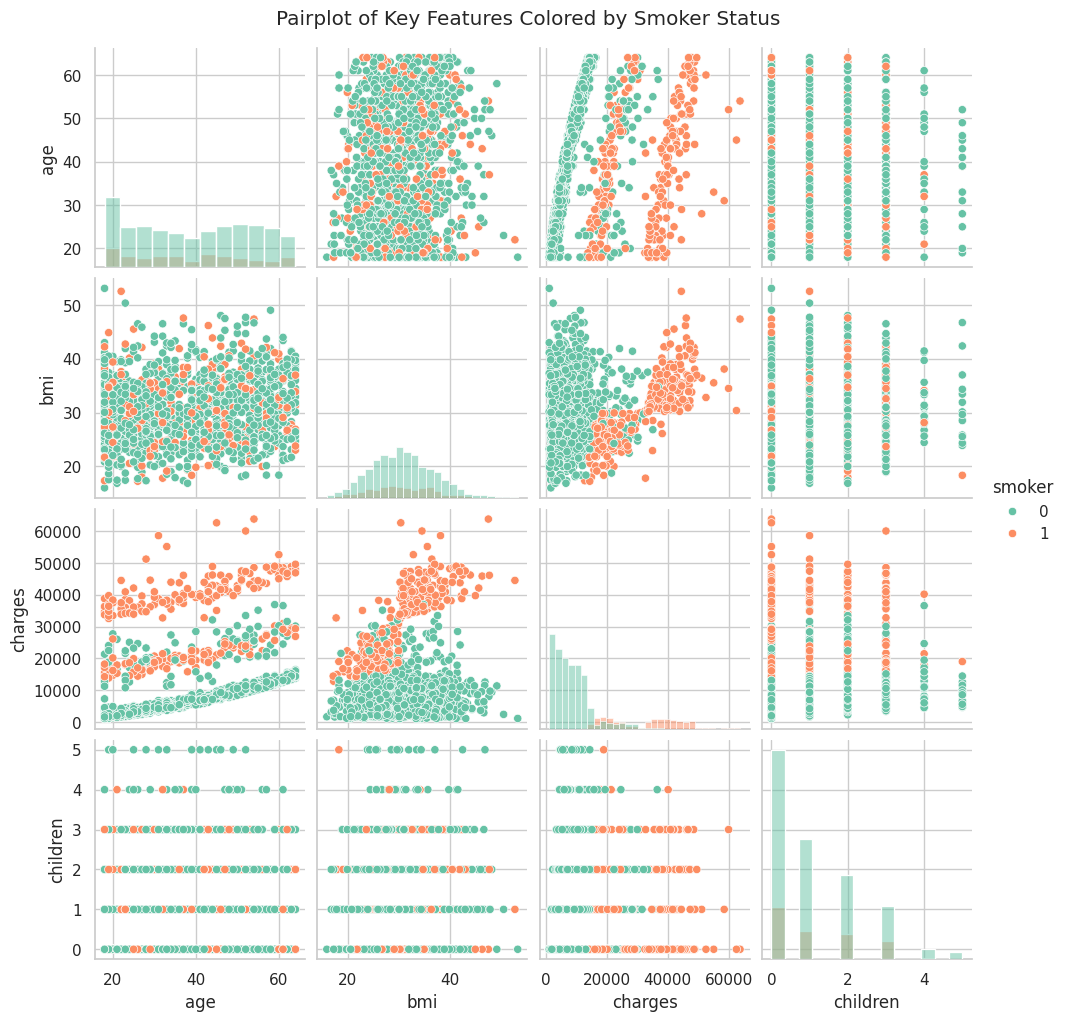

In [ ]:
#select key numerical columns for pairplot
pairplot_df=df[['age','bmi','charges','children','smoker']].copy()

#encode smoker using .loc
pairplot_df.loc[:,'smoker']=pairplot_df['smoker'].map({'yes':1,'no':0})

#plot pairplot with 'smoker' as hue
sns.pairplot(pairplot_df,hue='smoker',diag_kind='hist',palette='Set2')
plt.suptitle("Pairplot of Key Features Colored by Smoker Status",y=1.02)
plt.show()

Pairplot provides a visual overview of relationships between key numerical features, while differentiating smoker status using color.

Strong separation is visible between smokers and non-smokers. Smokers are clustered in higher charge ranges (above USD 20,000), especially when combined with higher BMI or age. This supports the high correlation 0.79, found between smoker and charges in the correlation heatmap.

A slight upward trend shows that higher BMI is associated with higher charges. The effect is more pronounced for smokers, indicating compounding risk factors.

Older individuals have higher medical charges, consistent with expectations that health risks increase with age. Smokers again incur higher charges at every age level, amplifying this trend.

There's no strong pattern or relationship between age and BMI, indicating that weight issues occur across all age groups. Smokers and non-smokers are spread similarly across this plot.

No strong relationship between number of children and other variables. This confirms the low correlation value of 0.07 seen earlier.

Therefore, the pairplot visually reinforces findings from the correlation matrix. Smoker status is the strongest driver of increased insurance charges, whereas age and BMI contribute moderately to the cost. Children and sex have minimal influence on charges. The pairplot also highlights interaction effects whereby smokers with high BMI or advanced age face significantly higher charges than their non-smoking peers. This validates the need for targeted risk adjustments in premium pricing.

In [ ]:
#T-Test: Charges of Smokers vs Non-Smokers
from scipy.stats import ttest_ind

#separate charges for smokers and non smokers
smoker_charges = df[df['smoker']=='yes']['charges']
non_smoker_charges = df[df['smoker']=='no']['charges']

#perform independent t-test
t_stat, p_val = ttest_ind(smoker_charges, non_smoker_charges,equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

T-statistic: 32.7519
P-value: 0.0000


From the independent samples t-test, the p-value is significantly lesser than 0.05, indicating strong evidence against the null hypothesis. Therefore, we reject the null hypothesis and conclude that there is a statistically significant difference in average charges between the smokers and non-smokers. The results confirm that smokers pay significantly higher insurance charges than non-smokers. This supports earlier visual and correlation analyses, highlighting smoking status as a major factor influencing insurance costs.

# **Recommendation**

Based on the analysis, it is strongly recommended that insurance companies incorporate smoking status as a critical factor in their premium pricing models. Smoking has the most significant impact on insurance charges, making it essential to adjust premiums accordingly and to promote smoking cessation programs among policyholders.

Additionally, age and BMI should be factored into risk assessments since they moderately influence insurance costs. Insurance providers could further benefit from implementing wellness initiatives focused on healthy weight management and preventive healthcare.  Incentive-based premiums could also be introduced like offering discounts for participating in weight loss programs or annual health screenings.

Regional differences, especially in areas like Southeast with higher average BMI and charges, suggest that localized health interventions could help mitigate risk.

Meanwhile, factors like sex and number of children have minimal impact on charges and therefore should not play a major role in pricing decisions.

In overall, encouraging healthier lifestyles through incentives and education could reduce long-term claims and benefit both insurers and insured individuals. Since this dataset is simulated and lacks other key health indicators like cholesterol levels or blood pressure, future models may benefit from incorporating additional health metrics for more comprehensive risk assessments.

# **Conclusion**

The comprehensive exploratory data analysis reveals that smoking status is the dominant determinant of insurance premium charges, with smokers consistently paying significantly higher costs that non-smokers. This finding is supported by strong visual evidence and statistically significant test results. Age and BMI also contribute to elevated charges, though their effects are less pronounced compared to smoking. Other demographic factors like sex, region and number of children appear to have minimal influence on insurance costs. While the dataset used is simulated, the patterns observed align with common industry knowledge, emphasizing the importance of modifiable lifestyle factors in insurance risk assessment. These insights provide a solid foundation for developing targeted premium pricing strategies and health programs that could lead to improved risk management and better health outcomes.

# **Additional Elements Supporting The Analysis**



In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

#encode categorical variables
df_encoded=df.copy()
label_encoders={}
for col in ['sex','smoker','region']:
  le=LabelEncoder()
  df_encoded[col]=le.fit_transform(df_encoded[col])
  label_encoders[col]=le

#define X and Y
X=df_encoded[['age','sex','bmi','children','smoker','region']]
y=df_encoded['charges']

#add constant to the model (intercept)
X=sm.add_constant(X)

#Fit the model
model=sm.OLS(y,X).fit()

#print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        14:37:43   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.130    -12.371      0.0

The Multiple Linear Regression analysis further supports earlier findings by quantifyinf rhe individual impact of each predictor on insurance charges. The model explains approximately 75.1% of the variance in charges, indicating a strong fit. Smoking status remains the most influential factor, with smokers paying an average of USD 23,820 more than non-smokers, holding other variables constant and this is confirmed by the p-value which is less than 0.05, showing a statistically significant result. Age and BMI are positively and significantly associated with charges, where each additional year of age increases charges by around USD 257, and each additional BMI unit by USD 333. The number of children and region show smaller but statistically significant effects, while sex has no significant impact as the p-value is 0.694, aligning with the earlier EDA findings. These regression outcomes not only reinforce the importance of lifestyle factors like smokiong and obesity but also validate the visual and statistical insights from exploratory analysis, making them highly actionable for insurance pricing strategies.


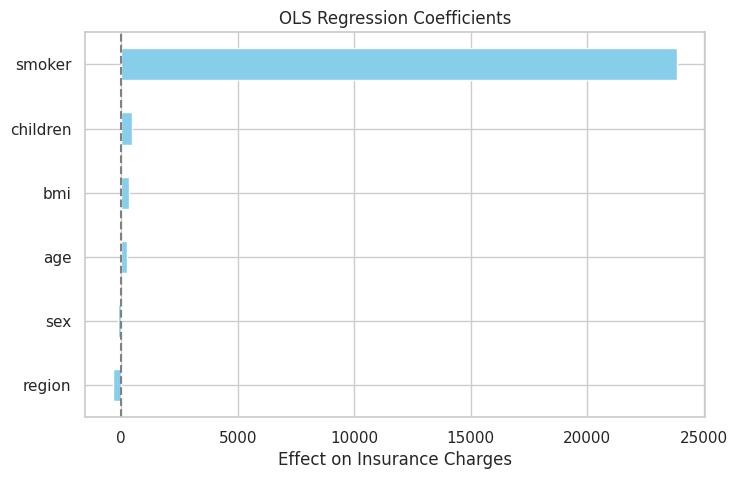

In [ ]:
coefs=model.params.drop('const')
plt.figure(figsize=(8,5))
coefs.sort_values().plot(kind='barh',color='skyblue')
plt.title('OLS Regression Coefficients')
plt.xlabel('Effect on Insurance Charges')
plt.axvline(x=0,color='gray',linestyle='--')
plt.tight_layout
plt.show()

Smoking has very strong positive effect on insurance charges. Being a smoker increases predicted charges around USD 24,000, holding other factors constant. As analysed above, this is the most impactful factor in the model.

Age, BMI and number of children variables have positive but relatively small impact on insurance charges. Older age, higher BMI, and more children slightly increase premiums. They are moderately relevant but not as influential as smoking.

Sex has a very minor effect, and not a key variable in pricing decisions.

Some regions are associated with slightly lower charges. There might be regional differences in healthcare costs or health behaviors, but again the effect is minor.

Therefore, smoking status dominates all other variables in its influence on insurance charges. Age, BMI, and number of children have small but meaningful effects. Sex and region has minimal influence.